In [1]:
from sympy import *
from sympy.plotting import plot

In [2]:
qi = Symbol('q_i')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
n = Symbol('n')
qj = Symbol('q_j')
f = Symbol('F')
tax_prod = Symbol('tau_p')
tax_cons = Symbol('tau_c')

p = a - tax_cons - b*(qi+(n-1)*qj)
profits = (p-tax_prod-c)*qi - f
foc = diff(profits,qi)
symm_foc = foc.subs({qj:qi})

print('br function')
qi_solve = solve(symm_foc,qi)[0]
display(qi_solve)

print('profit function')
profits_solve = profits.subs({qi:qi_solve,qj:qi_solve})
display(simplify(expand(profits_solve)))

print('n')
n_solve = solve(profits_solve,n)
n_solve = floor(n_solve[1])
display(n_solve)

print('p')
p_solve = p.subs({qi:qi_solve,qj:qi_solve})
display(simplify(expand(p_solve)))
p_solve = p_solve.subs({n:n_solve})
p_solve = simplify(expand(p_solve))
display(p_solve)



print('mkt q')
mkt_q = simplify(expand(n_solve*qi_solve.subs({n:n_solve})))
display(qi_solve*n)
display(mkt_q)


br function


(a - c - tau_c - tau_p)/(b*(n + 1))

profit function


(-F*b*n**2 - 2*F*b*n - F*b + a**2 - 2*a*c - 2*a*tau_c - 2*a*tau_p + c**2 + 2*c*tau_c + 2*c*tau_p + tau_c**2 + 2*tau_c*tau_p + tau_p**2)/(b*(n**2 + 2*n + 1))

n


floor((-F*b + sqrt(F*b)*(a - c - tau_c - tau_p))/(F*b))

p


(a + c*n + n*tau_p - tau_c)/(n + 1)

(a - c - tau_c - tau_p + (c + tau_p)*floor(sqrt(F*b)*(a - c - tau_c - tau_p)/(F*b)))/floor(sqrt(F*b)*(a - c - tau_c - tau_p)/(F*b))

mkt q


n*(a - c - tau_c - tau_p)/(b*(n + 1))

(-a + c + tau_c + tau_p + (a - c - tau_c - tau_p)*floor(sqrt(F*b)*(a - c - tau_c - tau_p)/(F*b)))/(b*floor(sqrt(F*b)*(a - c - tau_c - tau_p)/(F*b)))

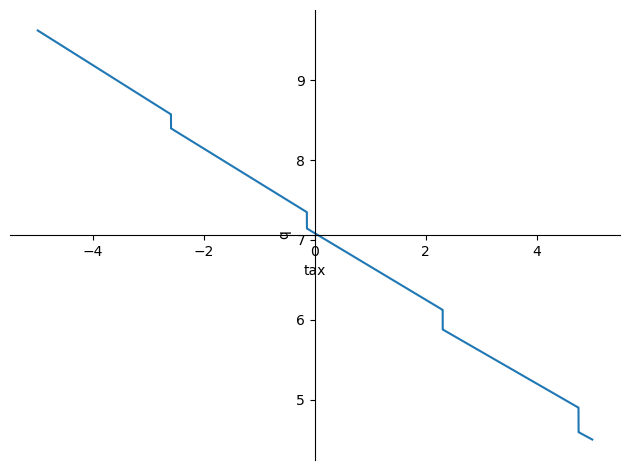

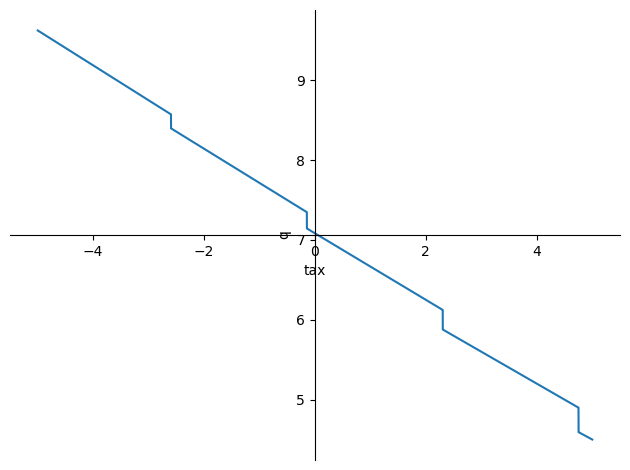

In [3]:

f_value = 3
b_value = 2
c_value = 3
a_value = 20
cons_graph_dict = {f:f_value,b:b_value,c:c_value,a:a_value,tax_prod:0}
prod_graph_dict = {f:f_value,b:b_value,c:c_value,a:a_value,tax_cons:0}


plot(mkt_q.subs(cons_graph_dict),(tax_cons,-5,5),xlabel='tax',ylabel='q')
plot(mkt_q.subs(prod_graph_dict),(tax_prod,-5,5),xlabel='tax',ylabel='q')


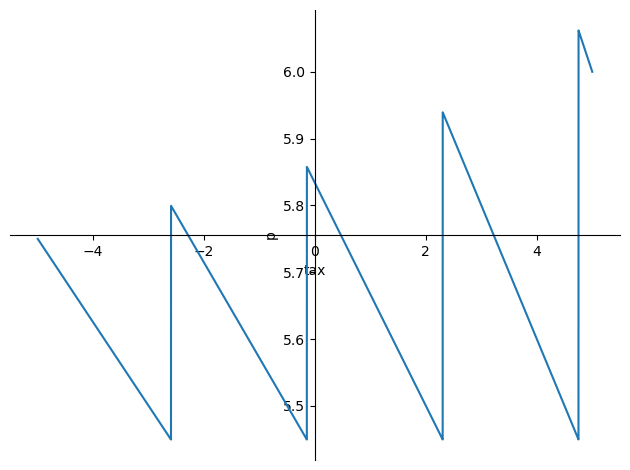

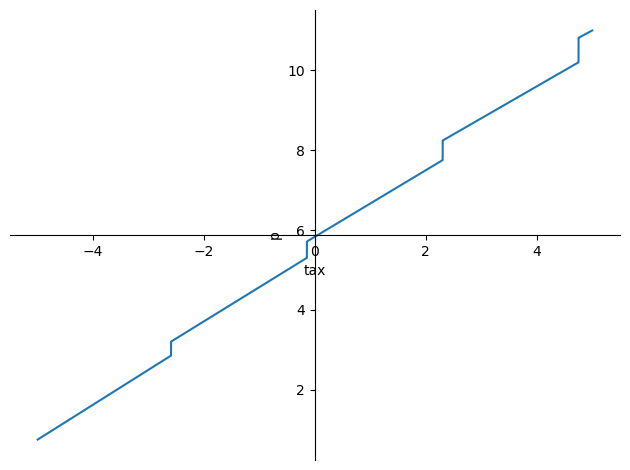

In [4]:
plot(p_solve.subs(cons_graph_dict),(tax_cons,-5,5),xlabel='tax',ylabel='p')
plot(p_solve.subs(prod_graph_dict),(tax_prod,-5,5),xlabel='tax',ylabel='p')

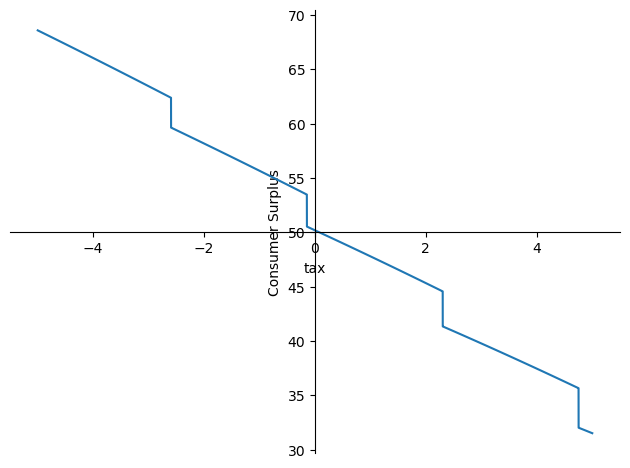

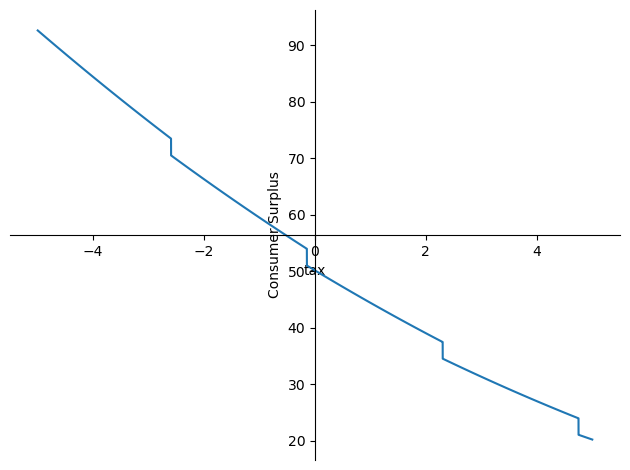

In [5]:
cs = 1/2*(a-p_solve)*mkt_q
plot(cs.subs(cons_graph_dict),(tax_cons,-5,5),xlabel='tax',ylabel='Consumer Surplus')
plot(cs.subs(prod_graph_dict),(tax_prod,-5,5),xlabel='tax',ylabel='Consumer Surplus')


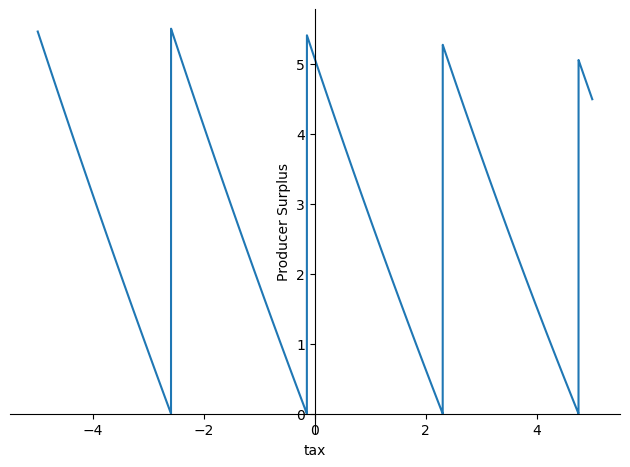

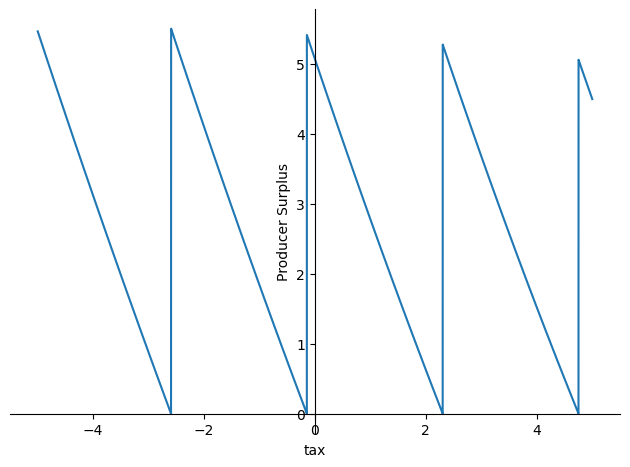

In [6]:
ps = n_solve*profits_solve.subs({n:n_solve})

plot(ps.subs(cons_graph_dict),(tax_cons,-5,5),xlabel='tax',ylabel='Producer Surplus')
plot(ps.subs(prod_graph_dict),(tax_prod,-5,5),xlabel='tax',ylabel='Producer Surplus')

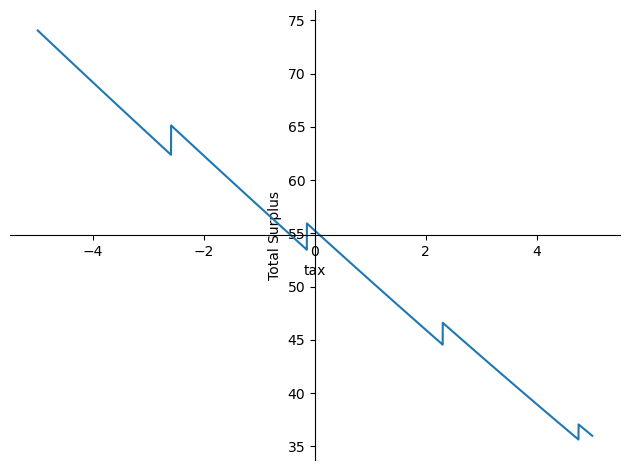

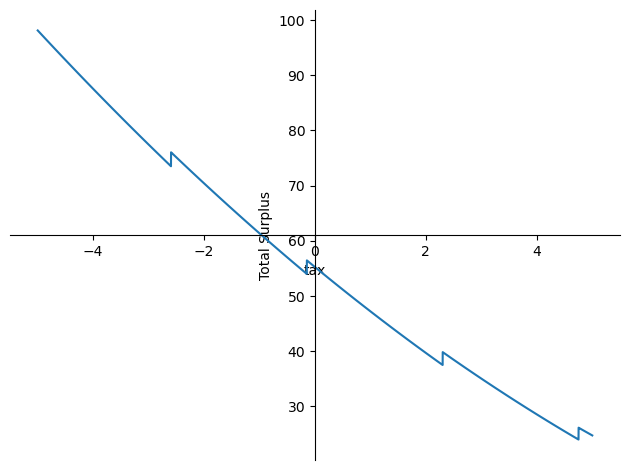

In [7]:
plot((ps+cs).subs(cons_graph_dict),(tax_cons,-5,5),xlabel='tax',ylabel='Total Surplus')
plot((ps+cs).subs(prod_graph_dict),(tax_prod,-5,5),xlabel='tax',ylabel='Total Surplus')